In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Question 1

In [3]:
a = np.array([7,12,14,19,7])
b = np.array([7,17,19,25,10])
c = np.array([15,12,19,22,11])
d = np.array([11,18,18,19,15])
e = np.array([9,18,18,23,11])
whole = np.append(a,b)
whole = np.append(whole,c)
whole = np.append(whole,d)
whole = np.append(whole,e)
dic = {
    "A" : pd.Series(a),
    "B" : pd.Series(b),
    "C" : pd.Series(c),
    "D" : pd.Series(d),
    "E" : pd.Series(e),
}
sum = np.sum(a) + np.sum(b) + np.sum(c) + np.sum(d) + np.sum(e)
total = len(a)+ len(b) + len(c) + len(d) + len(e)
grand_mean = sum/total
table = pd.DataFrame(dic)
o = table.mean()
avg_columns = np.array(o)
avg_columns=np.append(avg_columns,grand_mean)
table1 = table.transpose()
okk = table1.mean()
avg_rows = np.array(okk)
table["avg"] = avg_rows
table.loc[5] = avg_columns
table

,A,B,C,D,E,avg
0,7.0,7.0,15.0,11.0,9.0,9.80
1,12.0,17.0,12.0,18.0,18.0,15.40
2,14.0,19.0,19.0,18.0,18.0,17.60
3,19.0,25.0,22.0,19.0,23.0,21.60
4,7.0,10.0,11.0,15.0,11.0,10.80
5,11.8,15.6,15.8,16.2,15.8,15.04


In [94]:
# effects model
# SS(T) = SS(grand_mean) + SS(treatment)  + SS(error)
SS_total = 0
SS_treatment = 0
for i in whole:
    SS_total += i**2
for i in table.avg[0:5]:
    SS_treatment = 5*((i - grand_mean)**2)
SS_error = 0
for i in a:
    SS_error += (i-np.mean(a))**2

for i in b:
    SS_error += (i-np.mean(b))**2

for i in c:
    SS_error +=(i-np.mean(c))**2

for i in d:
    SS_error +=(i-np.mean(d))**2

for i in e:
    SS_error +=(i-np.mean(e))**2

SS_grandmean = total*(grand_mean**2)
DOF_total = total
DOF_treatment = len(a) - 1
DOF_grandmean = 1
DOF_error = DOF_total - DOF_treatment - DOF_grandmean 
dic1 = {
    "Sum of Squares" : pd.Series(np.array([SS_total,SS_grandmean,SS_treatment, SS_error, SS_total])),
    "DOF"            : pd.Series(np.array([DOF_total , DOF_grandmean, DOF_treatment , DOF_error , DOF_error + DOF_treatment + DOF_grandmean])),
    "MS mean"        : pd.Series(np.array([np.nan,np.nan,SS_treatment/DOF_treatment , SS_error/DOF_error , np.nan])),
    "Fo"             : pd.Series(np.array([np.nan , np.nan,(SS_treatment/DOF_treatment)/(SS_error/DOF_error), np.nan , np.nan])),
      
}
lets = pd.DataFrame(dic1)
lets.index = ["Total","Grandmean","Between treatments" , "Error(within treatments)" , "Total"]
lets

,Sum of Squares,DOF,MS mean,Fo
Total,22.341600,30,NaN,NaN
Grandmean,22.119253,1,NaN,NaN
Between treatments,0.008269,5,0.001654,0.330297
Error(within treatments),0.120167,24,0.005007,NaN
Total,22.341600,30,NaN,NaN


In [31]:
# f_4,20,0.05 = 2.866
f_check = 2.866
ok_now = False
f_exp =lets.Fo["Between treatments"]
if f_exp > f_check:
    ok_now = True
else:
    ok_now = False
print(f"The claim that cotton content affects the mean tensile strength is {ok_now} ")

The claim that cotton content affects the mean tensile strength is False 


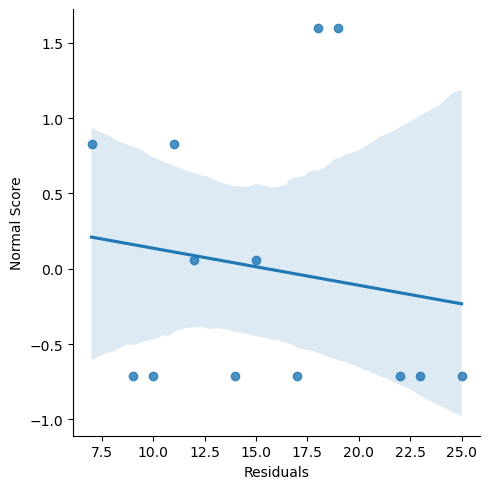

In [52]:
whole1 = []
a = np.unique(whole)
a = np.sort(a)
for i in a:
    whole1.append(np.count_nonzero(whole == i))
whole1 = np.array(whole1)  
mean = np.mean(whole1)
variance = np.std(whole1)**2
now = []
for j in whole1:
    now.append((j - mean)/variance)
dic2 = {
    "Normal Score" : now,
    "Residuals"    : a
}
nows = pd.DataFrame(dic2)
sns.lmplot(x = "Residuals" , y = "Normal Score" , data = nows)

# Question 2

In [58]:
a = np.array([0.78,0.80,0.81,0.75,0.77,0.78])
b = np.array([0.85,0.85,0.92,0.86,0.81,0.83])
c = np.array([0.93 , 0.92, 0.95, 0.89 , 0.89, 0.83])
d = np.array([1.14,0.97,0.98,0.88,0.86,0.83])
e = np.array([0.97,0.86,0.78,0.76,0.76,0.75])
whole = np.append(a,b)
whole = np.append(whole,c)
whole = np.append(whole,d)
whole = np.append(whole,e)
dic = {
    "A" : pd.Series(a),
    "B" : pd.Series(b),
    "C" : pd.Series(c),
    "D" : pd.Series(d),
    "E" : pd.Series(e),
}
sum = np.sum(a) + np.sum(b) + np.sum(c) + np.sum(d) + np.sum(e)
total = len(a)+ len(b) + len(c) + len(d) + len(e)
grand_mean = sum/total
table = pd.DataFrame(dic)
o = table.mean()
avg_columns = np.array(o)
avg_columns=np.append(avg_columns,grand_mean)
table1 = table.transpose()
okk = table1.mean()
avg_rows = np.array(okk)
table["avg"] = avg_rows
table.loc[6] = avg_columns
table

,A,B,C,D,E,avg
0,0.780000,0.850000,0.930000,1.140000,0.970000,0.934000
1,0.800000,0.850000,0.920000,0.970000,0.860000,0.880000
2,0.810000,0.920000,0.950000,0.980000,0.780000,0.888000
3,0.750000,0.860000,0.890000,0.880000,0.760000,0.828000
4,0.770000,0.810000,0.890000,0.860000,0.760000,0.818000
5,0.780000,0.830000,0.830000,0.830000,0.750000,0.804000
6,0.781667,0.853333,0.901667,0.943333,0.813333,0.858667


In [97]:
# effects model
# SS(T) = SS(grand_mean) + SS(treatment)  + SS(error)
SS_total = 0
SS_treatment = 0
for i in whole:
    SS_total += i**2
SS_block = 0
SS_grandmean = total*(grand_mean**2)
bo = np.array(table.loc[6])
bo = np.delete(bo, len(bo)-1)
for j in bo:
    SS_treatment = 6*((j - grand_mean)**2)
for i in table.avg[0:6]:
    SS_block = 6*((i - grand_mean)**2)
SS_error = SS_total - SS_treatment - SS_block - SS_grandmean
DOF_total = total
DOF_treatment = len(bo)
DOF_grandmean = 1
DOF_block = len(a) -1
DOF_error = DOF_total - DOF_treatment - DOF_block - DOF_grandmean 
dic1 = {
    "Sum of Squares" : pd.Series(np.array([SS_total,SS_grandmean,SS_treatment,SS_block, SS_error, SS_error + SS_treatment + SS_block + SS_grandmean])),
    "DOF"            : pd.Series(np.array([DOF_total , DOF_grandmean, DOF_treatment ,DOF_block, DOF_error , DOF_error + DOF_treatment + DOF_block + DOF_grandmean])),
    "MS mean"        : pd.Series(np.array([np.nan,np.nan,SS_treatment/DOF_treatment ,SS_block/DOF_block, SS_error/DOF_error , np.nan])),
    "Fo"             : pd.Series(np.array([np.nan , np.nan,(SS_treatment/DOF_treatment)/(SS_error/DOF_error),(SS_block/DOF_block)/((SS_error/DOF_error)) ,np.nan , np.nan])),     
}
lets = pd.DataFrame(dic1)
lets.index = ["Total","Grandmean","Between treatments" ,"Blocking Factor" ,"Error(within treatments)" , "Total"]
lets

,Sum of Squares,DOF,MS mean,Fo
Total,22.341600,30,NaN,NaN
Grandmean,22.119253,1,NaN,NaN
Between treatments,0.012331,5,0.002466,0.243936
Blocking Factor,0.017931,5,0.003586,0.354720
Error(within treatments),0.192085,19,0.010110,NaN
Total,22.341600,30,NaN,NaN


In [98]:
# f_5,19,0.05 = 2.740
f_check = 2.740
ok_now = False
f_exp =lets.Fo["Between treatments"]
if f_exp > f_check:
    ok_now = True
else:
    ok_now = False
print(f"The claim that nozzle design  affect  the  shape  factor is {ok_now} ")

The claim that nozzle design  affect  the  shape  factor is False 


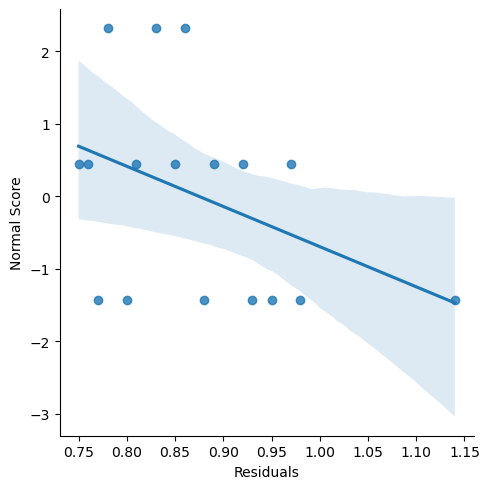

In [101]:
whole1 = []
a = np.unique(whole)
a = np.sort(a)
for i in a:
    whole1.append(np.count_nonzero(whole == i))
whole1 = np.array(whole1)  
mean = np.mean(whole1)
variance = np.std(whole1)**2
now = []
for j in whole1:
    now.append((j - mean)/variance)
dic2 = {
    "Normal Score" : now,
    "Residuals"    : a
}
nows = pd.DataFrame(dic2)
sns.lmplot(x = "Residuals" , y = "Normal Score" , data = nows)
